<a href="https://colab.research.google.com/github/janithcyapa/SmartHVAC/blob/main/Fuzzy%20Logic%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Library
https://scikit-fuzzy.github.io/scikit-fuzzy/

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Tipping Problem

### Antecedents (inputs)

- Service: how would you rate the service? (0-10)
  - bad, decent, great
- Food: how would you rate the food? (0-10)
  - bad, decent, great

### Consequents (outputs)
- Tip: how much tip would you give? (0-20)
  - low, medium, high

### Rules
- If food quality is bad or service quality is bad then the tip will be Jow
- If service quality is decent then the tip will be medium
- If service quality is great and food quality is great then the tip will be high

In [8]:
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
print(food)
print(food.universe)

Antecedent: food
[ 0  1  2  3  4  5  6  7  8  9 10]


In [9]:
tip = ctrl.Consequent(np.arange(0,21,1),'tip')
print(tip)
print(tip.universe)

Consequent: tip
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


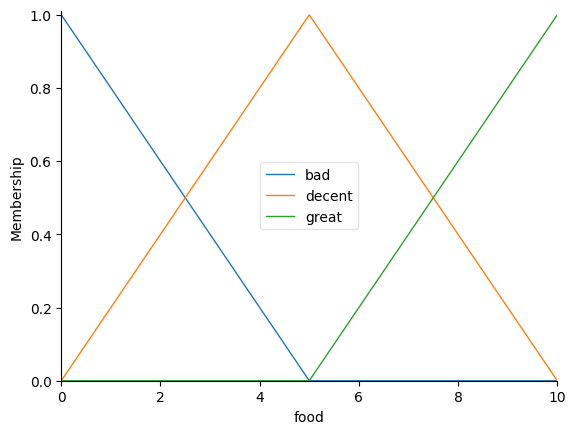

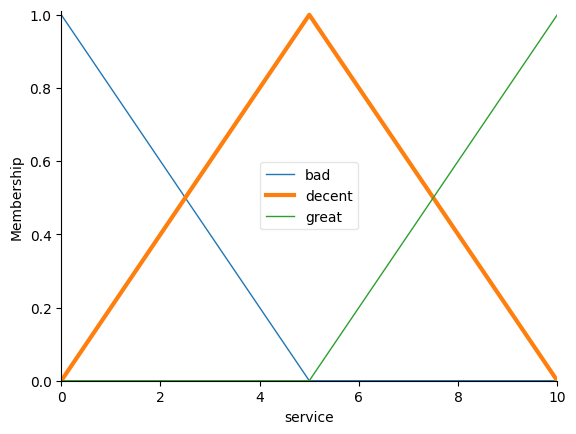

In [15]:
food.automf(number=3,names=['bad', 'decent', 'great'])
service.automf(number=3,names=['bad', 'decent', 'great'])
food.view()
service['decent'].view()

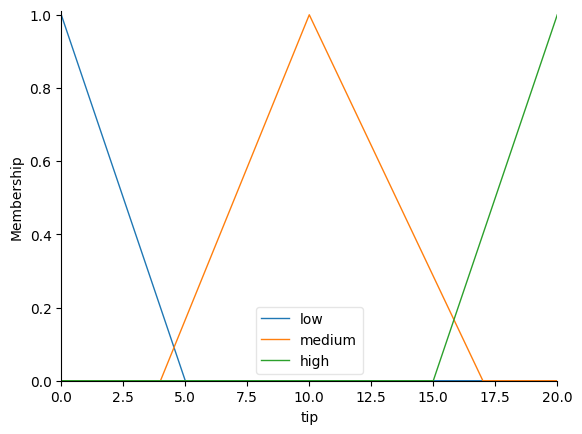

In [39]:
tip['low']= fuzz.trimf(tip.universe,[0,0,5])
tip['medium']= fuzz.trimf(tip.universe,[4,10,17])
tip['high']= fuzz.trimf(tip.universe,[15,20,20])
tip.view()

In [40]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(food['great'] | service['great'], tip['high'])
print(rule1)
print(rule2)
print(rule3)

IF food[bad] OR service[bad] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF service[decent] THEN tip[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF food[great] OR service[great] THEN tip[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [41]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
control_system

In [42]:
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system

12.932990814261254


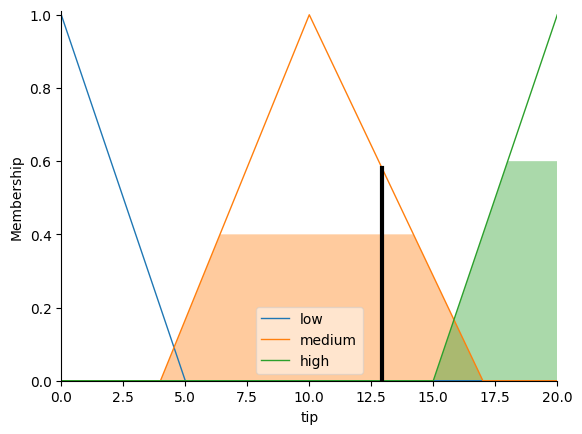

In [44]:
fuzzy_system.input['food'] = 6
fuzzy_system.input['service'] = 8

fuzzy_system.compute()
print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)

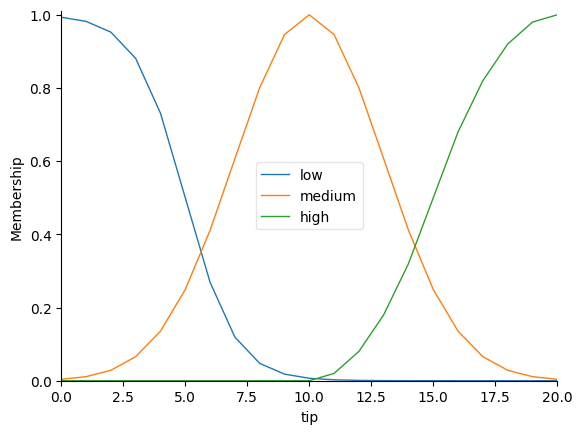

In [55]:
tip['low']= fuzz.sigmf(tip.universe,5,-1)
tip['medium']= fuzz.gaussmf(tip.universe,10,3)
tip['high']= fuzz.pimf(tip.universe,10,20,20,21)
tip.view()

17.06666666666667


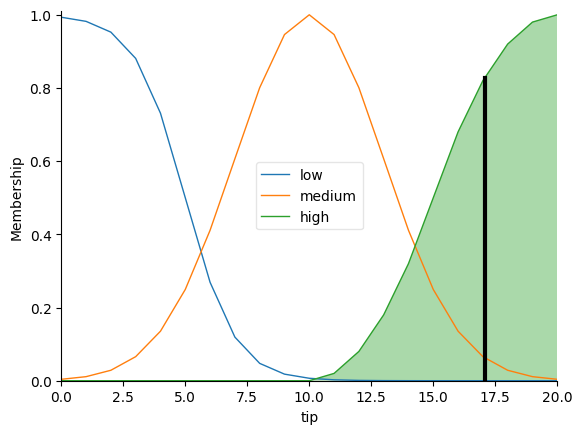

In [57]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(food['great'] | service['great'], tip['high'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['food'] = 10
fuzzy_system.input['service'] = 10

fuzzy_system.compute()
print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)